In [104]:
import numpy as np       #importing libraries
import pandas as pd
import seaborn as sns       #importing seaborn library
import matplotlib.pyplot as pplt    #importing matplotlib library
from sklearn.model_selection import train_test_split     #importing sklearn packages
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import r2_score

In [60]:
nba = pd.read_csv('nba_2013.csv')    #loading data into 'nba' dataframe

In [61]:
nba.head()   #displaying top 5 records

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [62]:
nba.info()      #details of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [63]:
nba.isnull().sum()     #finding null values

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [64]:
nba['x3p.'].fillna((nba['x3p.'].mean()), inplace=True)  #filling null values with mean values

In [65]:
nba['ft.'].fillna((nba['ft.'].mean()), inplace=True)    #filling null values with mean values

In [66]:
nba.dropna(inplace=True)      #removing all other null values

In [67]:
nba.isnull().sum()       #checking null values

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [68]:
nba.shape   #shape of dataframe

(478, 31)

In [69]:
nba.head()   #displaying top 5 records

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [70]:
nba.shape     #shape of dataframe

(478, 31)

In [71]:
pos = pd.get_dummies(nba['pos'],drop_first=True,prefix='pos')      #labeling columns

In [72]:
nba = pd.concat([nba,pos],axis=1)     #merging both original dataframe & labeled column

In [73]:
print(set(nba.columns))      #printing all columns 

{'drb', 'x3p.', 'age', 'g', 'pos_SG', 'stl', 'blk', 'efg.', 'player', 'pos_F', 'pos_PG', 'fga', 'fg.', 'x3p', 'ast', 'season_end', 'ft.', 'x3pa', 'orb', 'bref_team_id', 'ft', 'x2p', 'season', 'pts', 'mp', 'pos_G', 'x2pa', 'trb', 'pos_SF', 'pos_PF', 'fg', 'gs', 'x2p.', 'pf', 'tov', 'pos', 'fta'}


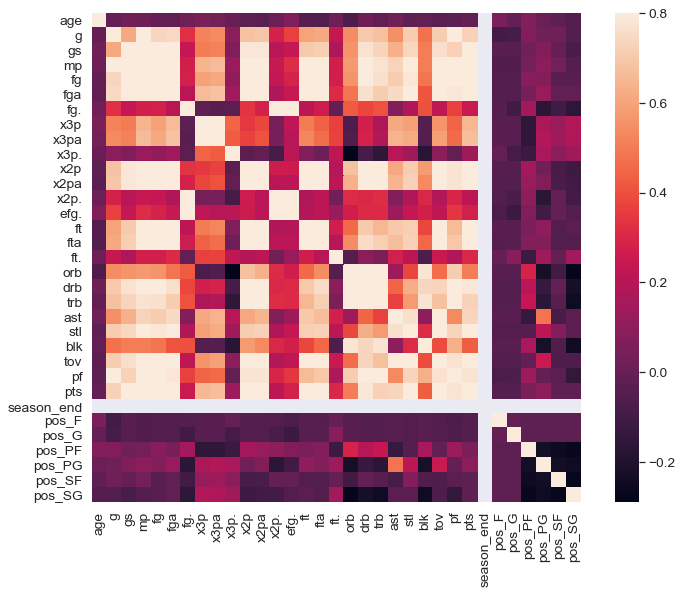

In [74]:
corrmat = nba.corr()        #correlation matrix
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

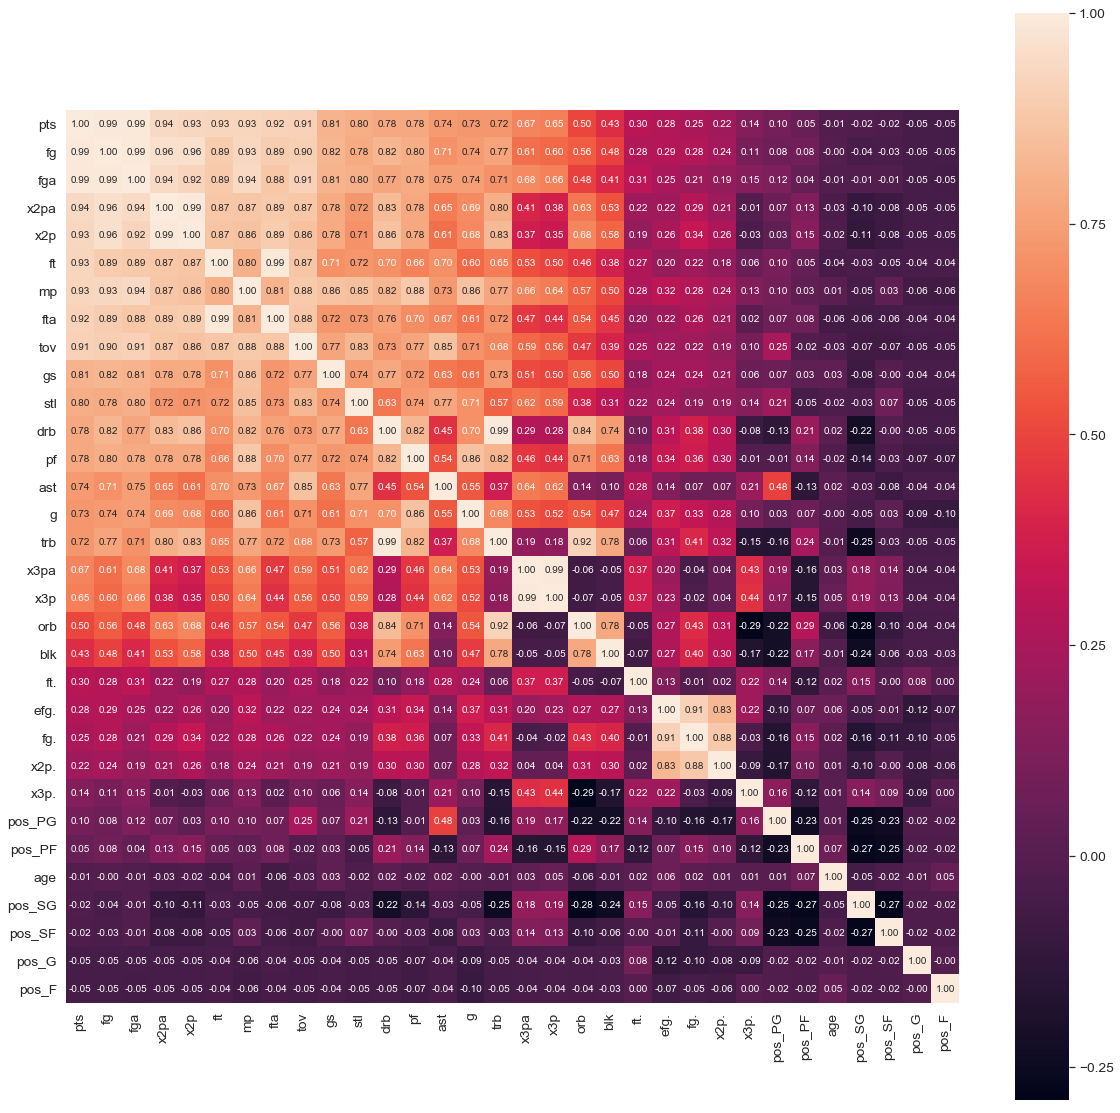

In [76]:
k = 32      #number of variables
cols = corrmat.nlargest(k, 'pts')['pts'].index
cm = np.corrcoef(nba[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = pplt.subplots(figsize=(20,20))  
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
pplt.show()

In [77]:
nba.drop(columns=['player','bref_team_id','pos','season','season_end'],inplace=True)
"""droping columns that are not correlated to 'pts' columns based on the above plotted graph on features corelation"""

"droping columns that are not correlated to 'pts' columns based on the above plotted graph on features corelation"

In [78]:
print(set(nba.columns))      #printing all columns 

{'drb', 'x3p.', 'age', 'g', 'pos_SG', 'stl', 'blk', 'efg.', 'pos_F', 'pos_PG', 'fga', 'fg.', 'x3p', 'ast', 'ft.', 'x3pa', 'orb', 'ft', 'x2p', 'pts', 'mp', 'pos_G', 'x2pa', 'trb', 'pos_SF', 'pos_PF', 'fg', 'gs', 'x2p.', 'pf', 'tov', 'fta'}


In [79]:
nba.head()   #displaying top 5 records

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pts,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,171,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,57,71,203,265,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,36,39,108,362,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,1330,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,328,0,0,0,0,0,0


In [80]:
X = nba.drop('pts',axis=1)      #splitting dataframe into dependent & independent dataset
y = nba['pts']

In [82]:
#spliting dataframe in training & test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [84]:
sc = StandardScaler()      #instance of Standard Scalar
X_train = sc.fit_transform(X_train)     #fitting training & test input set in standard form
X_test = sc.transform(X_test)      

C:\Users\Zubair\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Zubair\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Zubair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
regressor = KNeighborsRegressor(n_neighbors=10,weights='distance',metric='minkowski',p=2)  #instance of K-Nearest-Neighbours

In [102]:
regressor.fit(X_train,y_train)       #fitting training set into model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='distance')

In [103]:
y_pred = regressor.predict(X_test)     #predicting values from model

In [105]:
score=r2_score(y_test,y_pred)   #computing accuracy of model using r2 score

In [108]:
print("Accuracy of the KNN model is : "+str(score*100) +" %")      #printing accuracy

Accuracy of the KNN model is : 95.50596859149519 %
